In [1]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/train'
valid_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/test'


# add preprocessing layer to the front of ResNet
res = ResNet101(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in res.layers:
  layer.trainable = False

In [3]:
folders = glob('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/train/*')

# our layers - you can add more if you want
x = Flatten()(res.output)
x = Dense(224, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
len(folders)

4

In [4]:
model = Model(inputs=res.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy'],

# )

model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate = 0.0001),
    metrics=["accuracy"]
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path ,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path ,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 487 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


In [6]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/90
16/16 [==============================] - 81s 5s/step - loss: 0.8880 - accuracy: 0.8275 - val_loss: 1.1428 - val_accuracy: 0.8065
Epoch 2/90
16/16 [==============================] - 91s 6s/step - loss: 0.5610 - accuracy: 0.8871 - val_loss: 0.9337 - val_accuracy: 0.8065
Epoch 3/90
16/16 [==============================] - 95s 6s/step - loss: 0.5084 - accuracy: 0.8871 - val_loss: 0.7545 - val_accuracy: 0.8065
Epoch 4/90
16/16 [==============================] - 95s 6s/step - loss: 0.4823 - accuracy: 0.8871 - val_loss: 0.6723 - val_accuracy: 0.8065
Epoch 5/90
16/16 [==============================] - 98s 6s/step - loss: 0.5320 - accuracy: 0.8871 - val_loss: 0.7453 - val_accuracy: 0.8065
Epoch 6/90
16/16 [==============================] - 105s 7s/step - loss: 0.5137 - accuracy: 0.8871 - val_loss: 0.8941 - val_accuracy: 0.8065
Epoch 7/90
16/16 [==============================] - 104s 7s/step - loss: 0.4792 - accuracy: 0.8871 - val_loss: 0.6950 - val_accuracy: 0.8065
Epoch 8/90
16/16 [

In [7]:
from keras.models import load_model
model.save('C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/trained_resnet_multi.hdf5')

In [8]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
   valid_path, # Put your path here
     target_size=(224,224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# predictions = model.predict(test_set, steps=test_steps_per_epoch)

# def convert_array(arr_2d):
#     arr_1d = np.zeros(arr_2d.shape[0])
#     arr_1d[arr_2d[:, 0] >= 1] = 1
#     return arr_1d

predicted_classes = np.argmax(predictions, axis = 1)
# predicted_classes = convert_array(predictions)

Found 124 images belonging to 4 classes.
4/4 [==============================] - 20s 4s/step


In [9]:
predictions

array([[1.41238815e-18, 1.00000000e+00, 4.77741405e-16, 4.28330702e-26],
       [8.54934748e-15, 1.00000000e+00, 7.20068796e-11, 1.06313740e-18],
       [1.06117280e-17, 1.00000000e+00, 7.39230183e-14, 9.48277640e-23],
       [7.11145288e-18, 1.00000000e+00, 2.58645004e-16, 1.50325605e-25],
       [5.91851781e-18, 1.00000000e+00, 2.06234960e-16, 3.36868027e-27],
       [6.76245742e-19, 1.00000000e+00, 6.10034121e-17, 3.30921418e-26],
       [1.49500822e-12, 1.00000000e+00, 4.86681181e-12, 2.40003275e-19],
       [3.75586056e-17, 1.00000000e+00, 9.80632066e-16, 3.18728047e-23],
       [2.74059310e-16, 1.00000000e+00, 1.84153497e-15, 1.00760789e-24],
       [1.55480995e-14, 1.00000000e+00, 1.63223032e-13, 1.35699323e-22],
       [3.73898173e-15, 1.00000000e+00, 1.00602537e-13, 1.83480306e-23],
       [1.95381298e-11, 1.00000000e+00, 6.47704224e-10, 5.94679015e-16],
       [1.09392180e-19, 1.00000000e+00, 6.10727402e-19, 6.48324533e-29],
       [1.27506024e-13, 1.00000000e+00, 1.46421135e

In [10]:
predicted_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [12]:
true_classes

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3])

In [13]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                    precision    recall  f1-score   support

earVentilationTube       0.00      0.00      0.00         4
            normal       0.81      1.00      0.89       100
     otitisexterna       0.00      0.00      0.00        16
    tympanoskleros       0.00      0.00      0.00         4

          accuracy                           0.81       124
         macro avg       0.20      0.25      0.22       124
      weighted avg       0.65      0.81      0.72       124



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

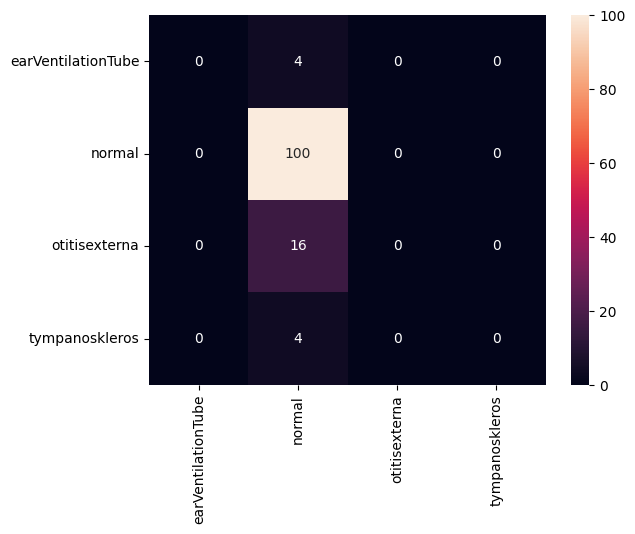

In [14]:
from sklearn.metrics import confusion_matrix
# y_prded_labels = predicted_classes
# y_test = true_classes
# plt.figure(figsize(16 , 9))
import seaborn as sns
cm = confusion_matrix(true_classes , predicted_classes)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels = class_labels)

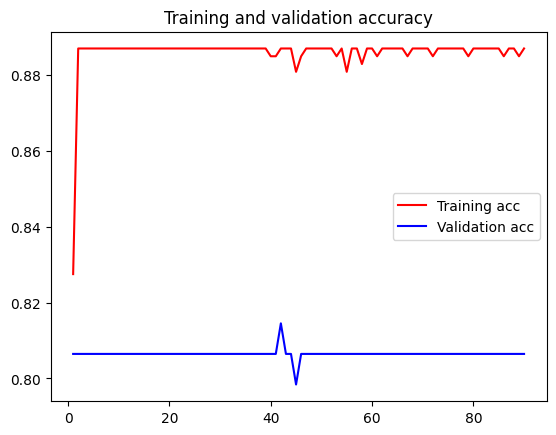

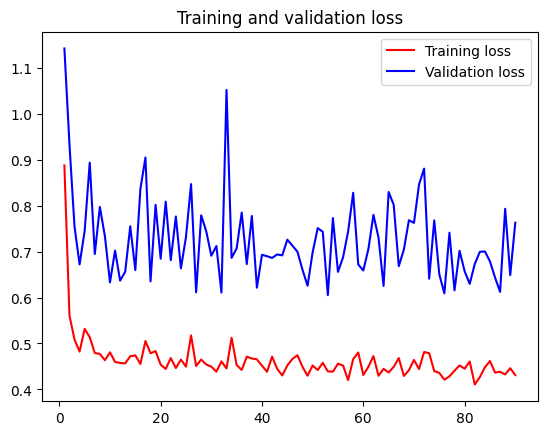

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()